**The main target of this work for me - study plotly (graph_objs.) Since I've rarely used plotly before, I'll start with the most common charts.**

**Df contains movies and TV shows that are presented on the well-known service Netflix.**

**Columns in df:**
* id - unique identification number;
* type - TV Show or movie;
* director;
* cast - actors;
* country;
* date added - date added on Netflix;
* release year;
* listed in - genres;
* description.

In [ ]:
import numpy as np 
import pandas as pd
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

In [ ]:
df.info()

**The director, cast and country columns contain many nan values, so I will replace them with 'no_information'**

**Rows with empty values in the 'date added' and 'rating' columns will be deleted**

**I will also add the columns necessary for further analysis and make two new dataframes by sorting them by 'type'**

In [ ]:
# nan
df['director'].fillna('no_information', inplace=True)
df['cast'].fillna('no_information', inplace=True)
df['country'].fillna('no_information', inplace=True)
df.dropna(subset=['date_added', 'rating'], inplace=True)

# genre
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

# date added
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].apply(lambda x: x.year)
df['month_added'] = df['date_added'].apply(lambda x: x.month)
df['weekday_added'] = df['date_added'].apply(lambda x: x.dayofweek)
c = {1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 
     7 : 'July', 8 : 'August', 9: 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
df['month_added']=df['month_added'].map(c)
d = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['weekday_added']=df['weekday_added'].map(d)


# Movie vs TV Show
df_movies = df[df['type']=='Movie']
df_tv_shows = df[df['type']=='TV Show']

**Lets see ratio between movies and TV shows**

In [ ]:
fig = go.Figure(go.Pie(
    values=df['type'].value_counts(),
    labels=['Movies', 'TV shows'],
    pull=[0, 0.1],
    marker=dict(colors=['blue', 'red'])) )
fig.update_layout(
    title=dict(
        text='TV Show VS Movie',
        x=0.5,
        font=dict(
            color='black',
            size=24)),
        legend=dict(
            orientation='h',
            yanchor='top',
            y=1.1,
            xanchor='left',
            x=0.6,
            font=dict(
                size=16,
                color='black'
            )
))
fig.show()

**Most of them are movies - almost 70%**

**Now let's see the previously added 'genre' column - let's count the number of movies and TV shows by genre.**

In [ ]:
genre_df_movies = df_movies['genre'].value_counts().to_frame()
genre_df_movies.reset_index(inplace=True)
genre_df_movies.rename(columns={'index':'Genre', 'genre':'Count'}, inplace=True)
genre_df_movies.sort_values(by='Count', inplace=True)

genre_df_tv_shows = df_tv_shows['genre'].value_counts().to_frame()
genre_df_tv_shows.reset_index(inplace=True)
genre_df_tv_shows.rename(columns={'index':'Genre', 'genre':'Count'}, inplace=True)
genre_df_tv_shows.sort_values(by='Count', inplace=True)

In [ ]:
fig = make_subplots(rows=2,
                    cols=1,
                   subplot_titles=('Number movies by genre', 'Number TV shows by genre'))

fig.add_trace(
    go.Bar(x=genre_df_movies['Genre'],
           y=genre_df_movies['Count'],
           marker=dict(
               color=genre_df_movies['Count'],
           colorscale='bluered')
    ),
    row=1,
    col=1)

fig.add_trace(
    go.Bar(x=genre_df_tv_shows['Genre'],
           y=genre_df_tv_shows['Count'],
           marker=dict(
               color=genre_df_tv_shows['Count'],
           colorscale='bluered')
    ),
    row=2,
    col=1)

fig.update_yaxes(mirror=True)

fig.update_layout(
    title=dict(
        text='Genres by movies and tv shows',
        x=0.5,
        font=dict(
            size=20, 
            color='black')),
    height=800,
    showlegend=False)
fig.show()

**Most popular movie genres:**
* Dramas;
* Comedies;
* Documentaries;
* Action & Adventure;
* Children & Family Movies.

**Most popular TV Show genres:**
* International TV Shows;
* Crime TV Shows;
* Kid's TV;
* British TV Shows;
* Docuseries.

**Now let's explore rating:**

In [ ]:
rating_df_movies = df_movies['rating'].value_counts().to_frame()
rating_df_movies.reset_index(inplace=True)
rating_df_movies.rename(columns={'index':'Rating', 'rating':'Count'}, inplace=True)
rating_df_movies.sort_values(by='Count', inplace=True)

rating_df_tv_shows = df_tv_shows['rating'].value_counts().to_frame()
rating_df_tv_shows.reset_index(inplace=True)
rating_df_tv_shows.rename(columns={'index':'Rating', 'rating':'Count'}, inplace=True)
rating_df_tv_shows.sort_values(by='Count', inplace=True)

In [ ]:
fig = make_subplots(rows=1,
                    cols=2,
                   subplot_titles=('Number movies by genre', 'Number TV shows by genre'))

fig.add_trace(
    go.Bar(y=rating_df_movies['Rating'],
           x=rating_df_movies['Count'],
           orientation='h',
           marker=dict(
               color='blue')
    ),
    row=1,
    col=1)

fig.add_trace(
    go.Bar(y=rating_df_tv_shows['Rating'],
           x=rating_df_tv_shows['Count'],
           orientation='h',
           marker=dict(
               color='red')
    ),
    row=1,
    col=2)

fig.update_layout(
    title=dict(
        text='Rating by movies and tv shows',
        x=0.5,
        font=dict(
            size=20, 
            color='black')),
    height=650,
showlegend=False)
fig.show()

**The share ratio of ratings is very similar in movies and TV shows.**
**Now explore the number of "Movie and TV Show", "Movie" and "TV Show" by the date of addition:**
* by year; 
* by month; 
* by weekday.

In [ ]:
# year movie
year_df_movies = df_movies['year_added'].value_counts().to_frame()
year_df_movies.reset_index(inplace=True)
year_df_movies.rename(columns={'index':'Year', 'year_added':'Count'}, inplace=True)
year_df_movies.sort_values(by='Year', inplace=True)

# year tv show
year_df_tv_shows = df_tv_shows['year_added'].value_counts().to_frame()
year_df_tv_shows.reset_index(inplace=True)
year_df_tv_shows.rename(columns={'index':'Year', 'year_added':'Count'}, inplace=True)
year_df_tv_shows.sort_values(by='Year', inplace=True)

# month movies
month_df_movies = df_movies['month_added'].value_counts().to_frame()
month_df_movies.reset_index(inplace=True)
month_df_movies.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

# month tv shows
month_df_tv_shows = df_tv_shows['month_added'].value_counts().to_frame()
month_df_tv_shows.reset_index(inplace=True)
month_df_tv_shows.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

# weekday movies
weekday_df_movies = df_movies['weekday_added'].value_counts().to_frame()
weekday_df_movies.reset_index(inplace=True)
weekday_df_movies.rename(columns={'index':'Weekday', 'weekday_added':'Count'}, inplace=True)

# weekday tv shows
weekday_df_tv_shows = df_tv_shows['weekday_added'].value_counts().to_frame()
weekday_df_tv_shows.reset_index(inplace=True)
weekday_df_tv_shows.rename(columns={'index':'Weekday', 'weekday_added':'Count'}, inplace=True)

In [ ]:
fig = go.Figure()

fig.add_trace( 
    go.Scatter( 
        mode='lines+markers',
        x=year_df_movies['Year'], 
        y=year_df_movies['Count'], 
        marker=dict(
            color='blue',
            size=10),
        line=dict(
            width=3,
            color='blue'),
        name='Movies'))

fig.add_trace( 
    go.Scatter( 
        mode='lines+markers',
        x=year_df_tv_shows['Year'], 
        y=year_df_tv_shows['Count'], 
        marker=dict(
            color='red',
            size=10),
        line=dict(
            width=3,
            color='red'),
        name='TV Shows'))

fig.update_xaxes(
    ticks='outside', 
    tickwidth=3, 
    tickcolor='black', 
    title='Year added', 
    title_font=dict(
        size=18), 
    color='black')
fig.update_yaxes(
    ticks='outside', 
    tickwidth=3, 
    tickcolor='black', 
    title='Number of movies and tv shows', 
    title_font=dict(
        size=18), 
    color='black')

fig.update_layout(
title = dict(
        text='Number movies and tv show by year added',
        font=dict(
            size=24,
            color='black'),
        x=0.5),
legend=dict(
    orientation='v',
    y=1,
    x=1,
    font=dict(
    size=14,
    color='black')))
fig.show()

**According to this schedule, we can draw a conclusion about how the service has developed. There is a significant increase after 2016:**

* The largest number of movies were added in 2019

* The largest number of TV Shows were added in 2020

**The first film and TV show were added in 2008. Let's see what it was:**

In [ ]:
df[df['year_added']==2008]

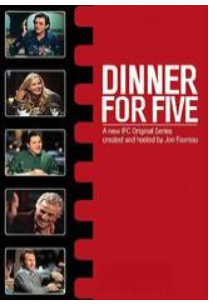 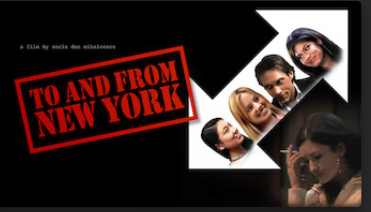

**I didn't watch them**

**Now let's explore movies and TV shows by month added**

In [ ]:
fig = make_subplots(rows=1,
                    cols=2, 
                    specs=[[{'type': 'xy'}, {'type': 'xy'}]],
                   subplot_titles=('Movies', 'TV Shows'))

fig.add_trace(
go.Funnel(y=month_df_movies['Month'],
         x=month_df_movies['Count'], 
         marker=dict( 
             color='blue'),
         showlegend=False
         ),
row=1,
col=1)

fig.add_trace(
go.Funnel(y=month_df_tv_shows['Month'],
         x=month_df_tv_shows['Count'], 
         marker=dict( 
             color='red'),
         showlegend=False
         ),
row=1,
col=2)

fig.update_layout(
    title=dict(
        text='Number of movies and TV Shows by month added',
        x=0.5,
        font=dict(
            size=20, 
            color='black'))
)
fig.show()

**Now let's analyse weekday added:**

In [ ]:
fig = make_subplots(rows=1,
                    cols=2, 
                    specs=[[{'type': 'pie'}, {'type': 'pie'}]])


fig.add_trace(
    go.Pie(
    values=weekday_df_movies['Count'],
    labels=weekday_df_movies['Weekday'],
    pull=[0, 0, 0, 0, 0, 0],
    marker=dict(colors=['red', 'crimson', 'darkorchid', 'indigo', 'midnightblue', 'mediumblue', 'darkblue'])),
    row=1, 
    col=1)

fig.add_trace(
    go.Pie(
    values=weekday_df_tv_shows['Count'],
    labels=weekday_df_tv_shows['Weekday'],
    pull=[0, 0, 0, 0, 0, 0],
    marker=dict(colors=['red', 'crimson', 'indigo', 'darkorchid', 'darkblue', 'midnightblue', 'mediumblue'])),
    row=1, 
    col=2)

fig.update_traces(
    textposition='inside', 
    hole=0.6)
fig.update_layout(
    title=dict(
        text='Movies and TV shows by weekday added',
        x=0.5,
        font=dict(
            size=20, 
            color='black')),
    annotations=[dict(
            text='Movies', 
            x=0.18, 
            y=0.5, 
            font=dict(
                size=12, 
                color='black'), 
            showarrow=False),
        dict(
            text='TV Shows', 
            x=0.83, 
            y=0.5, 
            font=dict(
                size=12, 
                color='black'), 
            showarrow=False)])
fig.show()

**The most popular day of the week is Friday. What is logical and predictable.**

**Now let's explore the release year**

In [ ]:
release_year = df['release_year'].value_counts().to_frame()
release_year.reset_index(inplace=True)
release_year.rename(columns={'index':'Release_year', 'release_year':'Count'}, inplace=True)
release_year.sort_values(by='Release_year', inplace=True)

release_year_movies = df_movies['release_year'].value_counts().to_frame()
release_year_movies.reset_index(inplace=True)
release_year_movies.rename(columns={'index':'Release_year', 'release_year':'Count'}, inplace=True)
release_year_movies.sort_values(by='Release_year', inplace=True)

release_year_tv_shows = df_tv_shows['release_year'].value_counts().to_frame()
release_year_tv_shows.reset_index(inplace=True)
release_year_tv_shows.rename(columns={'index':'Release_year', 'release_year':'Count'}, inplace=True)
release_year_tv_shows.sort_values(by='Release_year', inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace( 
    go.Scatter( # вид графика
        mode='lines',
        x=release_year_movies['Release_year'],  # значение для оси X
        y=release_year_movies['Count'], # значение для оси Y
        marker=dict(
            color='blue'),
        name='Movies'))

fig.add_trace( 
    go.Scatter( # вид графика
        mode='lines',
        x=release_year_tv_shows['Release_year'],  # значение для оси X
        y=release_year_tv_shows['Count'], # значение для оси Y
        marker=dict(
            color='red'),
        name='TV Shows'))

fig.update_xaxes(
    ticks='outside', 
    tickwidth=3, 
    tickcolor='black', 
    title='Release year', 
    title_font=dict(
        size=18), 
    color='black')
fig.update_yaxes(
    ticks='outside', 
    tickwidth=3, 
    tickcolor='black', 
    title='Number of movies and tv shows', 
    title_font=dict(
        size=18), 
    color='black')

fig.update_layout(
title = dict(
        text='Number movies and tv show by release year',
        font=dict(
            size=24,
            color='black'),
        x=0.5),
legend=dict(
    orientation='v',
    y=1,
    x=1,
    font=dict(
    size=14,
    color='black')))
fig.show()

**Oldest TV Show is "Pioneers: First Women Filmmakers":**

In [ ]:
df_tv_shows[df_tv_shows['release_year']==1925]

**Oldest movies are "Prelude to War" and "The Battle of Midway":**

In [ ]:
df_movies[df_movies['release_year']==1942]

* Most movies and TV Shows were released in 2018;
* Most movies were released in 2017;
* Most movies TV Shows released in 2020.

**Now let's analyze it by countries with the following conditions:**
* top 5 countries;
* release period: 2001 - 2020;
* five-year periods.

In [ ]:
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])
country_df = df['first_country'].value_counts().to_frame()
country_df.reset_index(inplace=True)
country_df.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)
country_df = country_df[country_df['Country']!='no_information']
country_df.head()

In [ ]:
# top countries
USA = df[df['first_country']=='United States']
India = df[df['first_country']=='India']
UK = df[df['first_country']=='United Kingdom']
Canada = df[df['first_country']=='Canada']
Japan = df[df['first_country']=='Japan']
top_countries = pd.concat([USA, India, UK, Canada, Japan])
#//////////////////////////////////////////////////////  Movies ///////////////////////////////////////////////////
top_countries_movies = top_countries[top_countries['type']=='Movie']

# 2016 - 2020
top_countries_movies_2016_2020 = top_countries_movies[top_countries_movies['release_year']>=2016][top_countries_movies[top_countries_movies['release_year']>=2016]['release_year']<=2020]
top_countries_movies_2016_2020_count = top_countries_movies_2016_2020['first_country'].value_counts().to_frame()
top_countries_movies_2016_2020_count.reset_index(inplace=True)
top_countries_movies_2016_2020_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

# 2011 - 2015
top_countries_movies_2011_2015 = top_countries_movies[top_countries_movies['release_year']>=2011][top_countries_movies[top_countries_movies['release_year']>=2011]['release_year']<=2015]
top_countries_movies_2011_2015_count = top_countries_movies_2011_2015['first_country'].value_counts().to_frame()
top_countries_movies_2011_2015_count.reset_index(inplace=True)
top_countries_movies_2011_2015_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

# 2006 - 2010
top_countries_movies_2006_2010 = top_countries_movies[top_countries_movies['release_year']>=2006][top_countries_movies[top_countries_movies['release_year']>=2006]['release_year']<=2010]
top_countries_movies_2006_2010_count = top_countries_movies_2006_2010['first_country'].value_counts().to_frame()
top_countries_movies_2006_2010_count.reset_index(inplace=True)
top_countries_movies_2006_2010_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

# 2001 - 2005
top_countries_movies_2001_2005 = top_countries_movies[top_countries_movies['release_year']>=2001][top_countries_movies[top_countries_movies['release_year']>=2001]['release_year']<=2005]
top_countries_movies_2001_2005_count = top_countries_movies_2001_2005['first_country'].value_counts().to_frame()
top_countries_movies_2001_2005_count.reset_index(inplace=True)
top_countries_movies_2001_2005_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)


#//////////////////////////////////////////////////////  TV shows ///////////////////////////////////////////////////
top_countries_tv_shows = top_countries[top_countries['type']=='TV Show']

# 2016 - 2020
top_countries_tv_shows_2016_2020 = top_countries_tv_shows[top_countries_tv_shows['release_year']>=2016][top_countries_tv_shows[top_countries_tv_shows['release_year']>=2016]['release_year']<=2020]
top_countries_tv_shows_2016_2020_count = top_countries_tv_shows_2016_2020['first_country'].value_counts().to_frame()
top_countries_tv_shows_2016_2020_count.reset_index(inplace=True)
top_countries_tv_shows_2016_2020_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

# 2011 - 2015
top_countries_tv_shows_2011_2015 = top_countries_tv_shows[top_countries_tv_shows['release_year']>=2011][top_countries_tv_shows[top_countries_tv_shows['release_year']>=2011]['release_year']<=2015]
top_countries_tv_shows_2011_2015_count = top_countries_tv_shows_2011_2015['first_country'].value_counts().to_frame()
top_countries_tv_shows_2011_2015_count.reset_index(inplace=True)
top_countries_tv_shows_2011_2015_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

# 2006 - 2010
top_countries_tv_shows_2006_2010 = top_countries_tv_shows[top_countries_tv_shows['release_year']>=2006][top_countries_tv_shows[top_countries_tv_shows['release_year']>=2006]['release_year']<=2010]
top_countries_tv_shows_2006_2010_count = top_countries_tv_shows_2006_2010['first_country'].value_counts().to_frame()
top_countries_tv_shows_2006_2010_count.reset_index(inplace=True)
top_countries_tv_shows_2006_2010_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

# 2001 - 2005
top_countries_tv_shows_2001_2005 = top_countries_tv_shows[top_countries_tv_shows['release_year']>=2001][top_countries_tv_shows[top_countries_tv_shows['release_year']>=2001]['release_year']<=2005]
top_countries_tv_shows_2001_2005_count = top_countries_tv_shows_2001_2005['first_country'].value_counts().to_frame()
top_countries_tv_shows_2001_2005_count.reset_index(inplace=True)
top_countries_tv_shows_2001_2005_count.rename(columns={'index':'Country', 'first_country':'Count'}, inplace=True)

In [ ]:
fig = go.Figure()
#//////////////////////////////////////////////////////  Movies ///////////////////////////////////////////////////
# 2016 - 2020 movies
fig.add_trace(
    go.Bar(x=top_countries_movies_2016_2020_count['Country'],
           y=top_countries_movies_2016_2020_count['Count'],
           marker=dict(color=top_countries_movies_2016_2020_count['Count'], colorscale='Bluered'),
           visible=True
    ))

# 2011 - 2015 movies
fig.add_trace(
    go.Bar(x=top_countries_movies_2011_2015_count['Country'],
           y=top_countries_movies_2011_2015_count['Count'],
           marker=dict(color=top_countries_movies_2011_2015_count['Count'], colorscale='Bluered'),
           visible=False
    ))

# 2006 - 2010 movies
fig.add_trace(
    go.Bar(x=top_countries_movies_2006_2010_count['Country'],
           y=top_countries_movies_2006_2010_count['Count'],
           marker=dict(color=top_countries_movies_2006_2010_count['Count'], colorscale='Bluered'),
           visible=False
    ))

# 2001 - 2005 movies
fig.add_trace(
    go.Bar(x=top_countries_movies_2001_2005_count['Country'],
           y=top_countries_movies_2001_2005_count['Count'],
           marker=dict(color=top_countries_movies_2001_2005_count['Count'], colorscale='Bluered'),
           visible=False
    ))


#//////////////////////////////////////////////////////  TV shows ///////////////////////////////////////////////////
# 2016 - 2020 TV shows
fig.add_trace(
    go.Bar(x=top_countries_tv_shows_2016_2020_count['Country'],
           y=top_countries_movies_2016_2020_count['Count'],
           marker=dict(color=top_countries_movies_2016_2020_count['Count'], colorscale='Bluered'),
           visible=False
    ))

# 2011 - 2015 TV shows
fig.add_trace(
    go.Bar(x=top_countries_tv_shows_2011_2015_count['Country'],
           y=top_countries_tv_shows_2011_2015_count['Count'],
           marker=dict(color=top_countries_tv_shows_2011_2015_count['Count'], colorscale='Bluered'),
           visible=False
    ))

# 2006 - 2010 TV shows
fig.add_trace(
    go.Bar(x=top_countries_tv_shows_2006_2010_count['Country'],
           y=top_countries_tv_shows_2006_2010_count['Count'],
           marker=dict(color=top_countries_tv_shows_2006_2010_count['Count'], colorscale='Bluered'),
           visible=False
    ))

# 2001 - 2005 TV shows
fig.add_trace(
    go.Bar(x=top_countries_tv_shows_2001_2005_count['Country'],
           y=top_countries_tv_shows_2001_2005_count['Count'],
           marker=dict(color=top_countries_movies_2001_2005_count['Count'], colorscale='Bluered'),
           visible=False
    ))


fig.update_layout(
    title=dict(
        text='2016 - 2020 (Movies)',
        x=0.5,
        font=dict(
        size=24,
        color='black')
    ),
    updatemenus=[
        dict(
            type='dropdown',
            active=0,
            x=0.1,
            y=1.1,
            buttons=list([
                dict(label='2016 - 2020 (Movies)',
                     method='update',
                     args=[{'visible': [True, False, False, False, False, False, False, False]},
                           {'title': '2016 - 2020 (Movies)'}]),
                dict(label='2011 - 2015 (Movies)',
                     method='update',
                     args=[{'visible': [False, True, False, False, False, False, False, False]},
                           {'title': '2011 - 2015 (Movies)'}]),
                dict(label='2006 - 2010 (Movies)',
                     method='update',
                     args=[{'visible': [False, False, True, False, False, False, False, False]},
                           {'title': '2006 - 2010 (Movies)'}]),
                dict(label='2001 - 2005 (Movies)', # надпись на кнопке
                     method='update',
                     args=[{'visible': [False, False, False, True, False, False, False, False]},
                           {'title': '2001 - 2005 (Movies)'}]),
                dict(label='2016 - 2020 (TV shows)',
                     method='update',
                     args=[{'visible': [False, False, False, False, True, False, False, False]},
                           {'title': '2016 - 2020 (TV shows)'}]),
                dict(label='2011 - 2015 (TV shows)',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, True, False, False]},
                           {'title': '2011 - 2015 (TV shows)'}]),
                dict(label='2006 - 2010 (TV shows)',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, True, False]},
                           {'title': '2006 - 2010 (TV shows)'}]),
                dict(label='2001 - 2005 (TV shows)', # надпись на кнопке
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, True]},
                           {'title': '2001 - 2005 (TV shows)'}]),
            ]),
        )
    ])
fig.show()

**You can view the results using the menu :)**